# Stock vs Index hurst index estimation - Log S-fbm model

### Done by : Othmane ZARHALI

# Importations

In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes"))

import matplotlib.pyplot as plt
from math import log
import warnings
warnings.filterwarnings("ignore")

from DataAcquisition import *
from GMMCalibration import *
from LogSfbmModel import *

# Oxford Man institute realized volatility acquisition

In [2]:
File_path = "/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes/oxfordmanrealizedvolatilityindices.csv"
realized_vol_data_obj_ox = DataAcquisition('OxfordManInstitute',File_path)

In [3]:
realized_vol_data_obj_ox.IndicesCharging()
indices_list = realized_vol_data_obj_ox.indices_list
vol_dataset = realized_vol_data_obj_ox.dataframe_indices
print(vol_dataset)

         index                 Unnamed: 0 Symbol  close_time  rk_parzen  \
0            0  2000-01-03 00:00:00+00:00   .AEX    163015.0   0.000179   
1            1  2000-01-04 00:00:00+00:00   .AEX    163016.0   0.000423   
2            2  2000-01-05 00:00:00+00:00   .AEX    163016.0   0.000324   
3            3  2000-01-06 00:00:00+00:00   .AEX    163002.0   0.000219   
4            4  2000-01-07 00:00:00+00:00   .AEX    163016.0   0.000155   
...        ...                        ...    ...         ...        ...   
139940  145271  2021-04-05 00:00:00+01:00   .STI    180000.0   0.000004   
139941  145272  2021-04-06 00:00:00+01:00   .STI    180000.0   0.000024   
139942  145273  2021-04-07 00:00:00+01:00   .STI    180000.0   0.000013   
139943  145274  2021-04-08 00:00:00+01:00   .STI    175959.0   0.000009   
139944  145275  2021-04-09 00:00:00+01:00   .STI    180000.0   0.000006   

        open_time  open_price     medrv       rv5        bv  ...    rk_th2  \
0         90101.0    

Indices available

In [4]:
indices_list

['.AEX',
 '.AORD',
 '.BFX',
 '.BSESN',
 '.BVLG',
 '.BVSP',
 '.DJI',
 '.FCHI',
 '.FTMIB',
 '.FTSE',
 '.GDAXI',
 '.GSPTSE',
 '.HSI',
 '.IBEX',
 '.IXIC',
 '.KS11',
 '.KSE',
 '.MXX',
 '.N225',
 '.NSEI',
 '.OMXC20',
 '.OMXHPI',
 '.OMXSPI',
 '.OSEAX',
 '.RUT',
 '.SMSI',
 '.SSEC',
 '.SSMI',
 '.STI']

##### Log vol computation

##### Let's consider two indices : NSEI and STI

In [5]:
log_vols_NSEI = realized_vol_data_obj_ox.GetlogVol(".NSEI",'bv',True,True,False,0,0)
log_vols_STI = realized_vol_data_obj_ox.GetlogVol(".STI",'bv',True,True,False,0,0)
print(log_vols_NSEI,log_vols_STI)

[ -9.09583846  -8.42565538  -8.41514315 ...  -9.20799311 -10.37571292
 -11.10107484] [-10.85806965 -10.23129018  -9.93152778 ...  -9.97600644  -9.8917955
  -9.86773188]


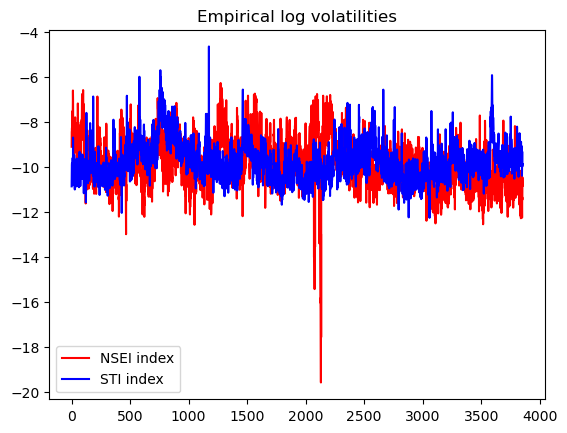

In [6]:
min_length = min(len(log_vols_NSEI),len(log_vols_STI))
time_line = np.arange(min_length)
plt.plot(time_line,log_vols_NSEI[:min_length], color='red',label='NSEI index')
plt.plot(time_line,log_vols_STI[:min_length], color='blue',label='STI index')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

##### Log vol statistics

##### Numerical tests -  NSEI

In [7]:
# NSEI
logvolvariance_overall_with_lag_NSEI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_NSEI)
print(logvolvariance_overall_with_lag_NSEI)

(array([   8,    9,   12,   14,   18,   22,   28,   34,   42,   52,   64,
         79,   98,  120,  148,  183,  226,  278,  343,  422,  521,  642,
        791,  975, 1201, 1480, 1824, 2248, 2770, 3413, 4206, 5183]), array([0.35842535, 0.37524941, 0.41599062, 0.4381994 , 0.47550027,
       0.50773756, 0.54964531, 0.58411015, 0.62014323, 0.65322222,
       0.6802255 , 0.7074864 , 0.73739737, 0.76633661, 0.79322425,
       0.81666472, 0.83875362, 0.86066882, 0.87920371, 0.89422324,
       0.9089994 , 0.92457659, 0.93926288, 0.95923213, 0.98452674,
       1.01168093, 1.04670444, 1.09140392, 1.13095154, 1.16028133,
       1.13001706,        nan]))


In [8]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek('.NSEI')
print(means_and_variance_eachday_in_week)

(array([-9.05457534, -8.70085103, -9.18843551, -9.21880093, -9.81530079]), array([0.78077038, 1.53100143, 0.56212798, 0.51751696, 0.01510113]))


In [9]:
correl = Correlation(log_vols_NSEI,log_vols_NSEI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([1.08385978, 0.78083193, 0.701292  , 0.65365305, 0.61472904,
       0.61077713, 0.55307408, 0.52553815, 0.49779351, 0.49031727,
       0.49593499, 0.45630645, 0.43516446, 0.43246381, 0.41850497,
       0.409631  , 0.37083193, 0.34827862, 0.34972304, 0.33220779,
       0.31701237, 0.28914225, 0.28188284, 0.28132966, 0.28327881,
       0.27685011, 0.26077149, 0.25676326, 0.25973784, 0.2636926 ,
       0.25447167, 0.24994179, 0.2480732 , 0.25472634, 0.25905081,
       0.25614122, 0.24835241, 0.25703416, 0.24836318, 0.25128471,
       0.24110904, 0.23756706, 0.24073382, 0.25230844, 0.26547803,
       0.26772659, 0.26084441, 0.26888187, 0.28068201, 0.26864436,
       0.28446571]))


##### Numerical tests -  STI

In [10]:
# STI
logvolvariance_overall_with_lag_STI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_STI)
print(logvolvariance_overall_with_lag_STI)

(array([   8,    9,   11,   14,   17,   21,   26,   32,   39,   48,   58,
         71,   87,  106,  130,  158,  193,  236,  288,  352,  430,  525,
        641,  782,  955, 1165, 1422, 1736, 2119, 2587, 3157, 3854]), array([0.18273815, 0.18972343, 0.20144343, 0.21593706, 0.22769403,
       0.24095312, 0.25510806, 0.26978724, 0.28439693, 0.30015858,
       0.31527965, 0.33189439, 0.34916642, 0.36677116, 0.38499093,
       0.40253773, 0.42001739, 0.43867449, 0.45920557, 0.48098552,
       0.5068847 , 0.53854361, 0.57256764, 0.60256036, 0.60940972,
       0.61395769, 0.62028397, 0.62769465, 0.63290987, 0.6567422 ,
       0.69929094,        nan]))


In [11]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek(".STI")
print(means_and_variance_eachday_in_week)

(array([-10.85806965, -10.23129018,  -9.93152778,  -9.82895074,
       -10.09268284]), array([1.15224036, 0.19949187, 0.02157454, 0.00196299, 0.09488728]))


In [12]:
correl = Correlation(log_vols_STI,log_vols_STI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([0.65945294, 0.49742405, 0.45827235, 0.44268707, 0.42729325,
       0.42060089, 0.40239439, 0.39835343, 0.39364837, 0.38300065,
       0.38237012, 0.36583987, 0.35021808, 0.35613399, 0.35539619,
       0.34918668, 0.3409036 , 0.33442755, 0.32939468, 0.32731938,
       0.32173866, 0.31295264, 0.31003246, 0.30617113, 0.30392936,
       0.30272755, 0.29056251, 0.2869957 , 0.28180388, 0.27833755,
       0.27958174, 0.27724508, 0.27578545, 0.26964285, 0.27446028,
       0.28156098, 0.2679243 , 0.26988708, 0.26415253, 0.26117487,
       0.26394733, 0.2579122 , 0.25592286, 0.24922336, 0.24350831,
       0.25146695, 0.24683316, 0.23884517, 0.23807632, 0.2312326 ,
       0.23689783]))


# Yahoo finance data acquisition

##### Log vol computation

##### Let's consider two stocks : GOOGL and AMZN

##### GOOGL

In [13]:
realized_vol_data_obj_yf_GOOGL = DataAcquisition('Yahoo finance')

In [14]:
realized_vol_data_obj_yf_GOOGL.IndicesCharging("GOOGL",first_date="1900-01-01",last_date="2034-01-01")
market_data_GOOGL = realized_vol_data_obj_yf_GOOGL.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [15]:
market_data_GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2022-11-01,95.449997,96.029999,90.370003,90.470001,90.470001,47161400
2022-11-02,90.940002,91.180000,86.879997,86.970001,86.970001,57038300
2022-11-03,86.320000,86.519997,83.339996,83.430000,83.430000,61288000


In [16]:
market_capitalization_GOOGL = realized_vol_data_obj_yf_GOOGL.market_capitalization

In [17]:
signal_test_GOOGL = market_data_GOOGL["Close"]

In [18]:
removed0signal_test_GOOGL = realized_vol_data_obj_yf_GOOGL.removeZeros(np.array(signal_test_GOOGL))
log_vol_estimator_GOOGL = realized_vol_data_obj_yf_GOOGL.ComputeLogVolEstimator()

##### AMZN

In [19]:
realized_vol_data_obj_yf_AMZN = DataAcquisition('Yahoo finance')

In [20]:
realized_vol_data_obj_yf_AMZN.IndicesCharging("AMZN",first_date="1900-01-01",last_date="2034-01-01")
market_data_AMZN = realized_vol_data_obj_yf_AMZN.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [21]:
market_data_AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300


In [22]:
market_capitalization_AMZN = realized_vol_data_obj_yf_AMZN.market_capitalization

In [23]:
signal_test_AMZN = market_data_AMZN["Close"]

In [24]:
removed0signal_test_AMZN = realized_vol_data_obj_yf_AMZN.removeZeros(np.array(signal_test_AMZN))
log_vol_estimator_AMZN = realized_vol_data_obj_yf_AMZN.ComputeLogVolEstimator()

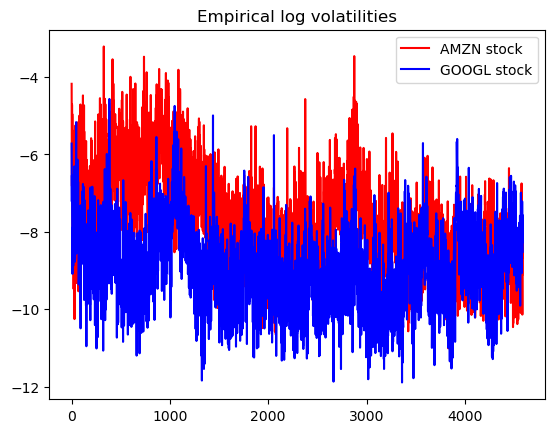

In [25]:
min_length = min(len(log_vol_estimator_AMZN),len(log_vol_estimator_GOOGL))
time_line = np.arange(min_length)
plt.plot(time_line,log_vol_estimator_AMZN[:min_length], color='red',label='AMZN stock')
plt.plot(time_line,log_vol_estimator_GOOGL[:min_length], color='blue',label='GOOGL stock')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

# GMM Calibration

In [26]:
GMM_obj = GMM()

### GMM on indices

##### NSEI

*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -5.177088703959428 -1.8406562878019843 0.06167521741129472
res =        fun: 0.014382097864422329
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.56943514e-05, -5.20417046e-10,  8.67361738e-10])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4556
      nit: 416
     njev: 1139
   status: 0
  success: True
        x: array([-5.1770887 , -1.84065629,  0.06167522])
*******************************
Objective function value after calibration =  0.005105415981393452


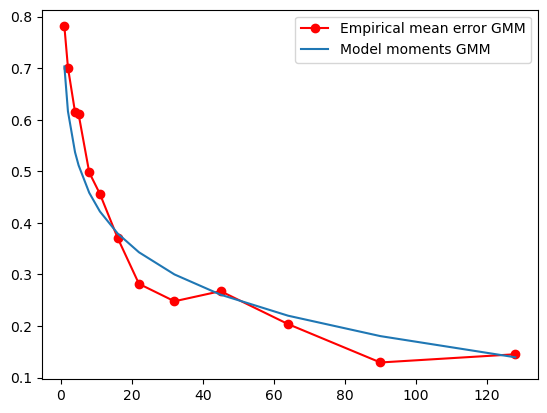

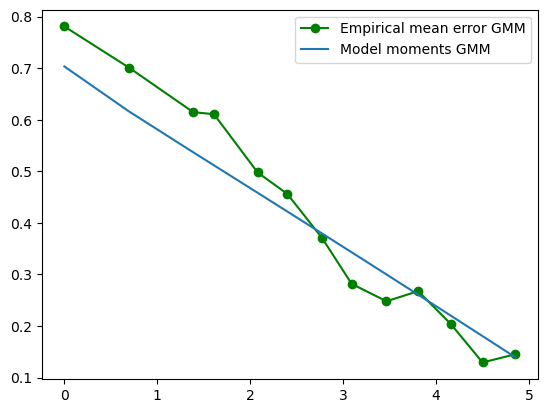

H =  0.005582377919682376 lambda2 = 0.10935691633908327 T =  1.0697488753025635 lsigma2 = 4.5399929762484854e-05 p-Value=  0.003166796958927884 J =  26.46137103156232 J_95 =  18.30703805327515
------------------------------------------------------


(0.005582377919682376,
 0.10935691633908327,
 1.0697488753025635,
 4.5399929762484854e-05,
 0.003166796958927884,
 26.46137103156232,
 18.30703805327515,
 [array([0.78083193, 0.701292  , 0.61472904, 0.61077713, 0.49779351,
         0.45630645, 0.37083193, 0.28188284, 0.2480732 , 0.26772659,
         0.203828  , 0.12942438, 0.14536152]),
  array([0.70328145, 0.61635971, 0.53697281, 0.51166717, 0.45837923,
         0.42220084, 0.37950863, 0.34310116, 0.30010809, 0.26083772,
         0.22011149, 0.18053947, 0.13949864]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [27]:
calibrated_parameters_NSEI = GMM_obj.ComputeParamsGMM(log_vols_NSEI)
calibrated_parameters_NSEI

##### STI

*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -2.2826846263078178 -3.3010791402799966 1.132697620607531
res =        fun: 0.000385662821968008
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.49464860e-06, -3.66276022e-07, -6.38367401e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 464
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([-2.28268463, -3.30107914,  1.13269762])
*******************************
Objective function value after calibration =  0.0011198642548073128


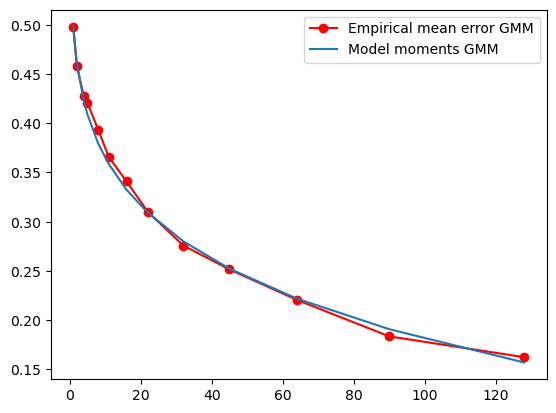

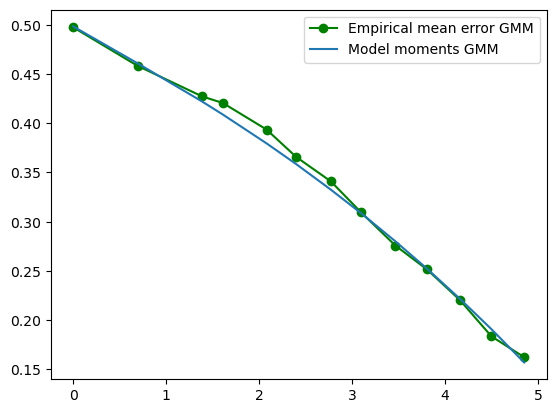

H =  0.076972167347693 lambda2 = 0.03952835398816385 T =  2.6278243571722353 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9319700526550283 J =  4.315956838027383 J_95 =  18.30703805327515
------------------------------------------------------


(0.076972167347693,
 0.03952835398816385,
 2.6278243571722353,
 4.5399929762484854e-05,
 0.9319700526550283,
 4.315956838027383,
 18.30703805327515,
 [array([0.49742405, 0.45827235, 0.42729325, 0.42060089, 0.39364837,
         0.36583987, 0.3409036 , 0.31003246, 0.27578545, 0.25146695,
         0.22053445, 0.18351524, 0.16235613]),
  array([0.49831654, 0.46081518, 0.42208908, 0.40887157, 0.37959705,
         0.35856292, 0.33247639, 0.3091001 , 0.2800925 , 0.25220777,
         0.22182169, 0.19079908, 0.15699248]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [28]:
calibrated_parameters_STI = GMM_obj.ComputeParamsGMM(log_vols_STI)
calibrated_parameters_STI

### GMM on stocks

##### GOOGL

*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -2.19577390001871 -3.009941747919866 1.1453997979278367
res =        fun: 0.0006557191872465509
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.24977069e-06, -1.17397412e-07, -2.32366211e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 388
      nit: 33
     njev: 97
   status: 2
  success: False
        x: array([-2.1957739 , -3.00994175,  1.1453998 ])
*******************************
Objective function value after calibration =  0.0012769661953849416


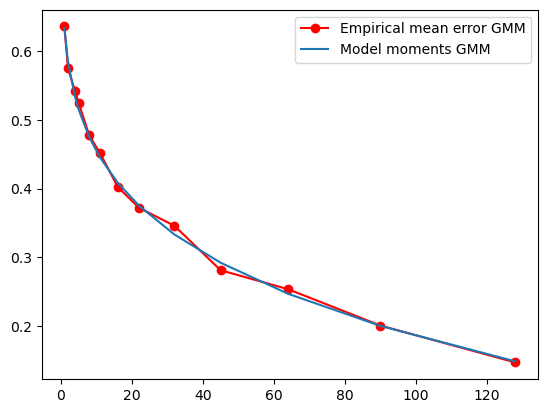

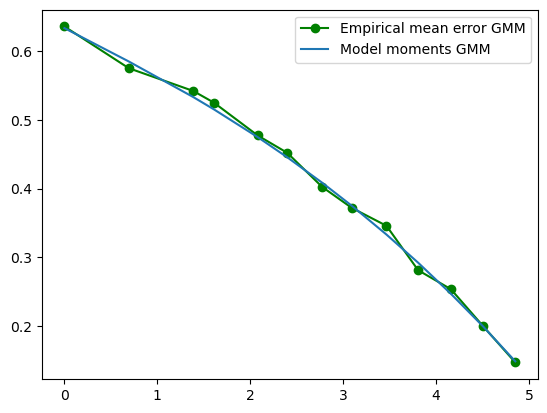

H =  0.09509402082836123 lambda2 = 0.04873512211546092 T =  2.985599215730608 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8269898888335387 J =  5.858720904426112 J_95 =  18.30703805327515
------------------------------------------------------


(0.09509402082836123,
 0.04873512211546092,
 2.985599215730608,
 4.5399929762484854e-05,
 0.8269898888335387,
 5.858720904426112,
 18.30703805327515,
 [array([0.63587813, 0.57514627, 0.54202092, 0.52500758, 0.4772991 ,
         0.45199261, 0.40249116, 0.37197041, 0.34575854, 0.28111303,
         0.25350918, 0.20062122, 0.14685662]),
  array([0.63352898, 0.58492223, 0.53317251, 0.51520423, 0.47489288,
         0.44551012, 0.40860656, 0.37511892, 0.33303756, 0.2920574 ,
         0.24683641, 0.20008466, 0.14849313]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [29]:
calibrated_parameters_GOOGL = GMM_obj.ComputeParamsGMM(log_vol_estimator_GOOGL)
calibrated_parameters_GOOGL

##### AMZN

*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -5.765014235670408 -2.4066740723001083 0.09710044789644137
res =        fun: 0.0013730882226002396
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.75304868e-05, 2.23336975e-06, 3.46487813e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 580
      nit: 55
     njev: 145
   status: 2
  success: False
        x: array([-5.76501424, -2.40667407,  0.09710045])
*******************************
Objective function value after calibration =  0.0008463392567569941


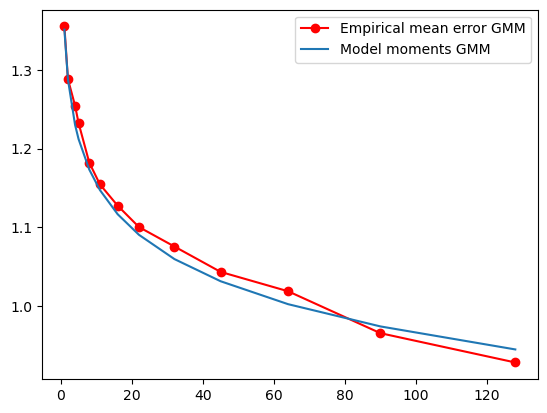

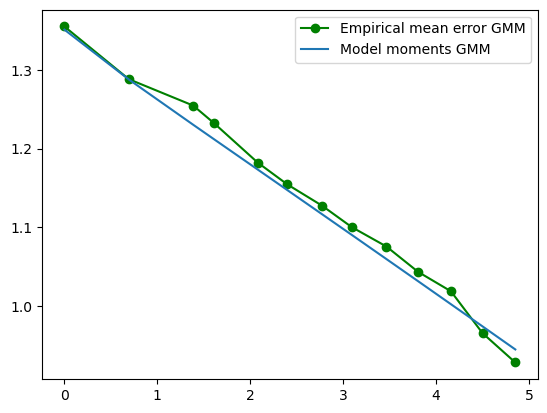

H =  0.0032490843978980875 lambda2 = 0.08014784942982733 T =  1.1081142091705 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8607859807931749 J =  5.42841999283936 J_95 =  18.30703805327515
------------------------------------------------------


(0.0032490843978980875,
 0.08014784942982733,
 1.1081142091705,
 4.5399929762484854e-05,
 0.8607859807931749,
 5.42841999283936,
 18.30703805327515,
 [array([1.35529615, 1.2882705 , 1.25467946, 1.23239183, 1.18226578,
         1.15450682, 1.12738048, 1.10020096, 1.07540122, 1.04314823,
         1.01853978, 0.96521726, 0.92795403]),
  array([1.35128697, 1.28791845, 1.23027915, 1.21194721, 1.17340781,
         1.14729108, 1.11652211, 1.09032516, 1.05943958, 1.03127543,
         1.00211437, 0.97382555, 0.94453414]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [30]:
calibrated_parameters_AMZN = GMM_obj.ComputeParamsGMM(log_vol_estimator_AMZN)
calibrated_parameters_AMZN

### Multiple Stock and indices calibration

### Indices

In [31]:
Indices_test_symbols = ['.AEX','.AORD','.BFX', '.BSESN']

In [32]:
logvol_synthesis_ox = realized_vol_data_obj_ox.LogVolSynthesisOverAssets(Indices_test_symbols)
logvol_synthesis_ox

{'.AEX': array([ -9.363648  ,  -9.2829408 ,  -9.50419861, ..., -10.49494979,
        -10.66919384, -10.78024093]),
 '.AORD': array([ -9.810457  , -10.30105542,  -9.36433307, ...,  -9.88412876,
        -10.28379873, -11.13394767]),
 '.BFX': array([ -9.71483899, -10.46947439, -10.05192215, ..., -10.47888137,
        -10.44993989, -11.10387582]),
 '.BSESN': array([ -8.93322485,  -8.79850441,  -8.76741764, ..., -10.37471496,
        -10.16140705, -10.44435716])}

In [33]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_ox)

*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -1.8969307791495735 -3.1231331896677355 1.6500941700433436
res =        fun: 0.0016549759696170706
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.87337126e-06, -2.40259203e-08, -1.41813645e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 328
      nit: 30
     njev: 82
   status: 2
  success: False
        x: array([-1.89693078, -3.12313319,  1.65009417])
*******************************
Objective function value after calibration =  0.0032210815825349814
H =  0.14739455949502311 lambda2 = 0.0347887316215732 T =  6.330691784202852 lsigma2 = 4.5399929762484854e-05 p-Value=  0.08794816830091372 J =  16.43073715245563 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -1.6679802965236832 -3.6750479891655115 1.9705802453673482
res =        fun: 0.0012374783836065658
 hess_inv: <3x3 LbfgsInvHessP

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,.AEX,0.147395,0.034789,6.330692,0.000045,0.087948,16.430737,18.307038
1,.AORD,0.190438,0.017229,10.211014,0.000045,0.535038,8.969106,18.307038
2,.BFX,0.136594,0.031163,5.574426,0.000045,0.617116,8.120010,18.307038
3,.BSESN,0.061786,0.052662,2.467283,0.000045,0.810317,6.058594,18.307038


### Stocks

In [34]:
Stocks_test_symbols = ["GOOGL","AAPL","AMZN"]

In [35]:
realized_vol_data_obj_yf= DataAcquisition('Yahoo finance')

In [36]:
logvol_synthesis_yf = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_symbols)
logvol_synthesis_yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'GOOGL': array([-5.72021842, -6.51914773, -7.21603027, ..., -8.281413  ,
        -7.56352142, -8.52265885]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -8.44066915,
         -6.48814455,  -8.2770449 ]),
 'AMZN': array([-4.17546521, -5.44415333, -5.70028569, ..., -7.21512383,
        -6.74468885, -7.647398  ])}

In [37]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf)

*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -2.19577390001871 -3.009941747919866 1.1453997979278367
res =        fun: 0.0006557191872465509
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.24977069e-06, -1.17397412e-07, -2.32366211e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 388
      nit: 33
     njev: 97
   status: 2
  success: False
        x: array([-2.1957739 , -3.00994175,  1.1453998 ])
*******************************
Objective function value after calibration =  0.0012769661953849416
H =  0.09509402082836123 lambda2 = 0.04873512211546092 T =  2.985599215730608 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8269898888335387 J =  5.858720904426112 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -2.3117035060468503 -2.9815423459808637 1.542809544612615
res =        fun: 0.001133638166214036
 hess_inv: <3x3 LbfgsInvHessProduc

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,GOOGL,0.095094,0.048735,2.985599,0.000045,0.826990,5.858721,18.307038
1,AAPL,0.064876,0.059217,3.291055,0.000045,0.565127,8.655009,18.307038
2,AMZN,0.003249,0.080148,1.108114,0.000045,0.860786,5.428420,18.307038


#### Conclusion : No surprise !
#### - Single assets have very low estimated hurst index than indices

### Construction of an index from existing stock data

Estimation of its hurst index

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -1.802646205743305 -4.097678245284339 1.8202779270439065
res =        fun: 0.0016562800226019
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.42767743e-07, -7.09068225e-08, -1.70436583e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 576
      nit: 54
     njev: 144
   status: 2
  success: False
        x: array([-1.80264621, -4.09767825,  1.82027793])
*******************************
Objective function value after calibration =  0.003486944595710792


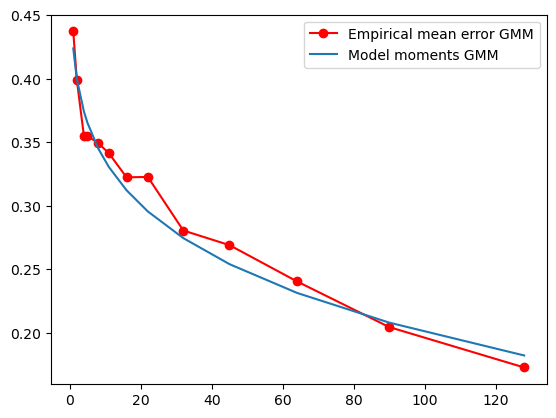

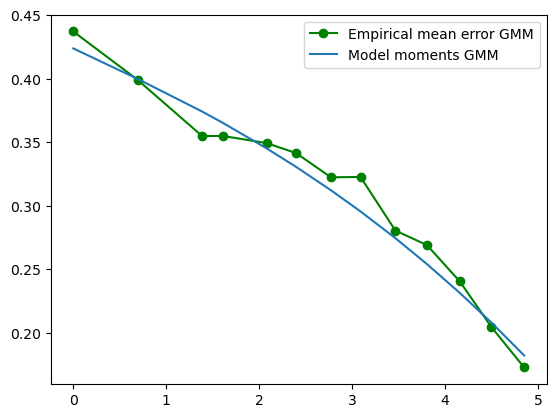

H =  0.096600207111565 lambda2 = 0.023994917956157623 T =  3.736193224716444 lsigma2 = 4.5399929762484854e-05 p-Value=  0.36893719186042156 J =  10.854858526447696 J_95 =  18.30703805327515
------------------------------------------------------


(0.096600207111565,
 0.023994917956157623,
 3.736193224716444,
 4.5399929762484854e-05,
 0.36893719186042156,
 10.854858526447696,
 18.30703805327515,
 [array([0.43709451, 0.39897957, 0.3547967 , 0.35485851, 0.3492496 ,
         0.34138332, 0.32231219, 0.32259356, 0.28042949, 0.26892882,
         0.24038907, 0.20442553, 0.1726317 ]),
  array([0.42377673, 0.39974287, 0.37409025, 0.3651706 , 0.34513819,
         0.33051925, 0.31213917, 0.29544299, 0.2744402 , 0.25396497,
         0.23134725, 0.20793949, 0.18208155]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [38]:
weights = [0.25,0.25,0.5]
# checker les H des stocks 
Stocks_test_synthindex_symbols = ["TSLA","AAPL","NVDA"]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(Stocks_test_synthindex_symbols,weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
H_gmm1, lambda2_gmm1, T_gmm1 =  -1.9562889610639367 -3.967762136381148 1.8332597530168278
res =        fun: 0.00097356359370312
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.33652379e-07, 1.20238022e-08, 2.15214133e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 584
      nit: 67
     njev: 146
   status: 0
  success: True
        x: array([-1.95628896, -3.96776214,  1.83325975])
*******************************
Objective function value after calibration =  0.002127062102177245


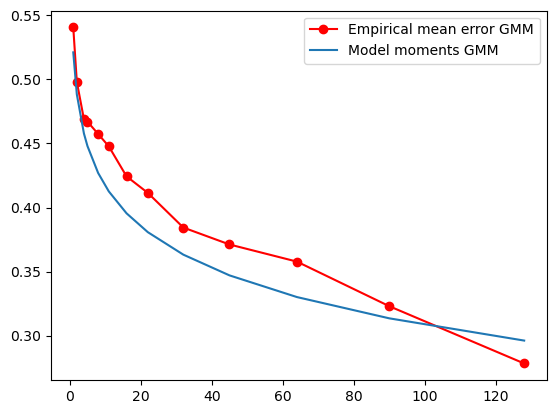

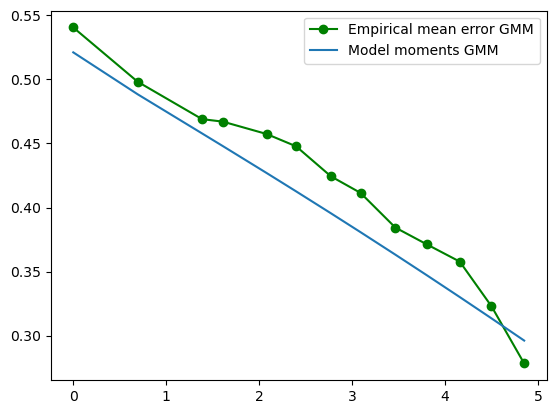

H =  0.018426762433356194 lambda2 = 0.03994633036625824 T =  1.4590380007090302 lsigma2 = 4.5399929762484854e-05 p-Value=  0.025647360823097563 J =  20.40490674618631 J_95 =  18.30703805327515
------------------------------------------------------


(0.018426762433356194,
 0.03994633036625824,
 1.4590380007090302,
 4.5399929762484854e-05,
 0.025647360823097563,
 20.40490674618631,
 18.30703805327515,
 [array([0.54050322, 0.49815724, 0.46898946, 0.46705293, 0.45743017,
         0.44779547, 0.42436907, 0.41145922, 0.38441909, 0.37121601,
         0.35784216, 0.32306958, 0.27838236]),
  array([0.52108805, 0.48838047, 0.45783099, 0.44797161, 0.42702084,
         0.41265083, 0.39554122, 0.3808196 , 0.36327938, 0.34710993,
         0.33019104, 0.31360461, 0.29624868]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [39]:
weights = [0.25,0.25,0.5]
Stocks_test_synthindex_symbols = ["UNH","CMCSA","BAC"]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(Stocks_test_synthindex_symbols,weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

# Mutlidimensional S-fbm model generation

- ### Sanity check: 1 dimensional S fbm

In [2]:
size = 4000
H=0.09
S_fbm_model = Sfbm(H,0.068970 ,2**14) #T=0.732075
Sfbmcorrelation = S_fbm_model.SfbmCorrelation(size)
S_fbm_model_generation_example = S_fbm_model.GenerateSfbm(size)
S_fbm_model_logvolgeneration_example = S_fbm_model.GeneratelogVol(size)
S_fbm_model_logvolgeneration_example_qv = S_fbm_model_logvolgeneration_example[0]
print(S_fbm_model_logvolgeneration_example_qv)

[ 0.56884789 -0.12327041  0.74528463 ...  0.02028286 -0.66778513
 -0.16703324]


*******************************
res =        fun: 0.0040743337083619085
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.05245024e-07, -5.00554462e-07,  3.86843335e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 684
      nit: 68
     njev: 171
   status: 0
  success: True
        x: array([-6.45341159, -2.05557976,  0.01274267])
*******************************
Objective function value after calibration =  0.005498091897368353


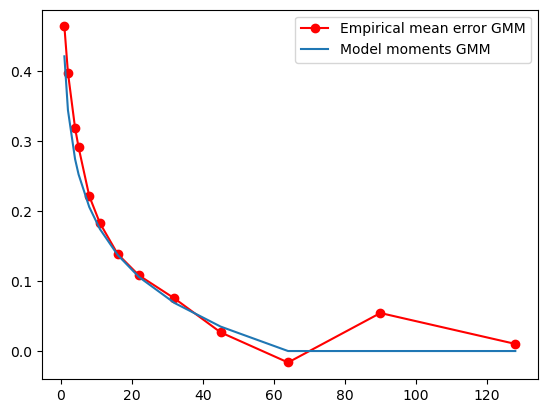

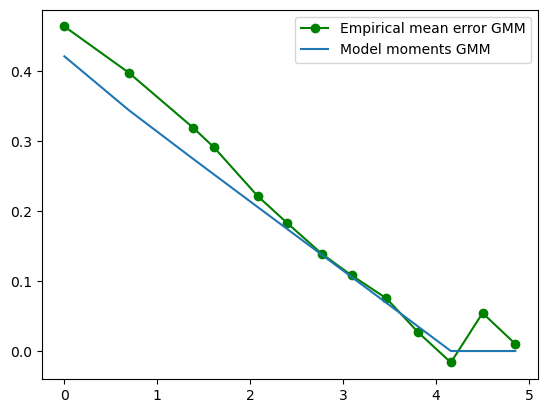

H =  0.0015715120499496047 lambda2 = 0.0975660103784674 T =  1.0131572101770836 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0151716321580158 J =  21.986869497576045 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_param1d =  (0.0015715120499496047, 0.0975660103784674, 1.0131572101770836, 4.5399929762484854e-05, 0.0151716321580158, 21.986869497576045, 18.30703805327515, [array([ 0.46340307,  0.39741406,  0.31876543,  0.29082184,  0.22129239,
        0.18271317,  0.13854498,  0.10798532,  0.07511221,  0.0266833 ,
       -0.01633807,  0.0542811 ,  0.01017016]), array([0.42079732, 0.34394908, 0.27425414, 0.25212384, 0.20565418,
       0.17420542, 0.13719786, 0.10572601, 0.06866463, 0.0349094 ,
       0.        , 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [4]:
GMM_1d = GMM()
index_estimatedGMM_param1d = GMM_1d.ComputeParamsGMM(S_fbm_model_logvolgeneration_example_qv,5,LagSignal=np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128]),
                         GMM_Method=1)
print("index_estimatedGMM_param1d = ", index_estimatedGMM_param1d)

- ### d dimensional S fbm

#### Model construction and H estimate

*******************************
res =        fun: 0.7027266937978711
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.25923717e-03, -2.68673974e-06,  8.77076185e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 888
      nit: 96
     njev: 222
   status: 2
  success: False
        x: array([-2.49818293,  1.97445945,  0.98750651])
*******************************
Objective function value after calibration =  0.002826242517866002


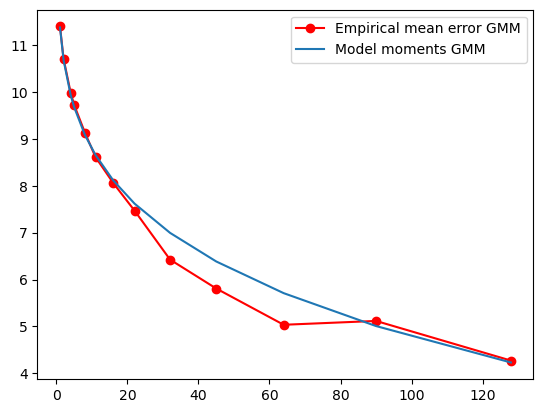

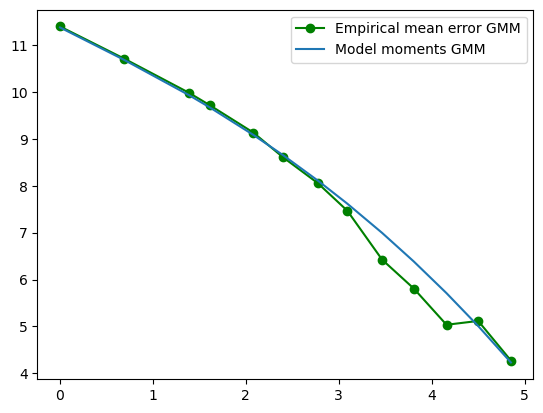

H =  0.10087461756266193 lambda2 = 0.6849412035641378 T =  3.656758739113291 lsigma2 = 4.5399929762484854e-05 p-Value=  0.33446782343190645 J =  11.302143828946082 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.10087461756266193, 0.6849412035641378, 3.656758739113291, 4.5399929762484854e-05, 0.33446782343190645, 11.302143828946082, 18.30703805327515, [array([11.39343612, 10.7050242 ,  9.98184029,  9.71811533,  9.13323991,
        8.60856354,  8.0563915 ,  7.46808662,  6.42477285,  5.80910692,
        5.03635879,  5.11819561,  4.27330889]), array([11.37263727, 10.67818009,  9.93162433,  9.67099026,  9.0838613 ,
        8.65394452,  8.1118064 ,  7.61787547,  6.99469122,  6.38530072,
        5.71014602,  5.00933525,  4.23286984]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [8]:
dimension = 2
Hs = [0.12 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)] 
Sfbms = [Sfbm(Hs[i], 0.068970 ,2**14) for i in range(dimension)]
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

*******************************
res =        fun: 0.2584663506466386
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.10107479e-03, -1.09190435e-05,  1.01795239e-03])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 572
      nit: 48
     njev: 143
   status: 2
  success: False
        x: array([-6.37742407,  0.49400288,  0.01479285])
*******************************
Objective function value after calibration =  0.004229198963503617


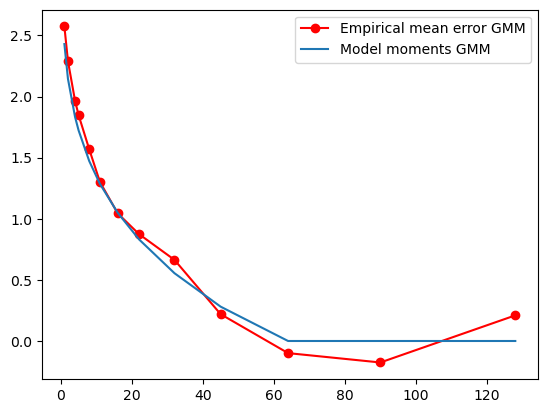

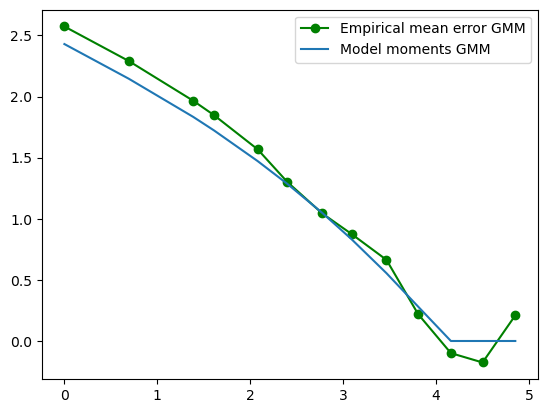

H =  0.11452796257515803 lambda2 = 0.2689899826189845 T =  2.576032500250896 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0763211839058286 J =  16.912566655050966 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.11452796257515803, 0.2689899826189845, 2.576032500250896, 4.5399929762484854e-05, 0.0763211839058286, 16.912566655050966, 18.30703805327515, [array([ 2.57309956,  2.29035907,  1.96533698,  1.84790438,  1.56797664,
        1.30167537,  1.04484112,  0.87474519,  0.66369867,  0.21946784,
       -0.09923468, -0.17580473,  0.2096261 ]), array([2.42925275, 2.14545297, 1.83333474, 1.72295898, 1.47189409,
       1.28606046, 1.04947777, 0.83188296, 0.55472918, 0.28105104,
       0.        , 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [6]:
dimension = 1
Hs = [0.15 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)]
Sfbms = [Sfbm(Hs[i], 0.02,2**14) for i in range(dimension)]  # 0.068970
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

####  The GMM calibration is aborted du to a small gradient norm (stopping condition). 
#### Let's plot the Hat{H} distribution over multiple index trajectories :  Rough independant processes 

*******************************
res =        fun: 121.246741252238
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.84319049, -6.18813407, 10.        ])
*******************************
Objective function value after calibration =  0.022660873057884
H =  0.8633256038519005 lambda2 = 0.0020494463078183805 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.354405845501772e-52 J =  271.86249407543437 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 95.21518214335211
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.

Objective function value after calibration =  0.027803972456716453
H =  0.8765508220520671 lambda2 = 0.0015013933730157459 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.2198506012758425e-65 J =  333.5642575632273 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 169.9097779865174
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 2.19560462, -7.07565799, 10.        ])
*******************************
Objective function value after calibration =  0.12741987185440773
H =  0.899854109366749 lambda2 = 0.0008447219262144577 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0 J =  1528.6562026373294 J_95 =  18.30703805327515
------------------------------------------------------
********

Objective function value after calibration =  0.042601475015879214
H =  0.7094518642053217 lambda2 = 0.0005282120183082783 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.88244231949223e-103 J =  511.08989576550294 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 100.96379689832531
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 3.83954011, -7.16817975, 10.        ])
*******************************
Objective function value after calibration =  0.017909257017629368
H =  0.9789491778304437 lambda2 = 0.0007701308084536832 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.273232157510653e-40 J =  214.85735644049953 J_95 =  18.30703805327515
------------------------------------------

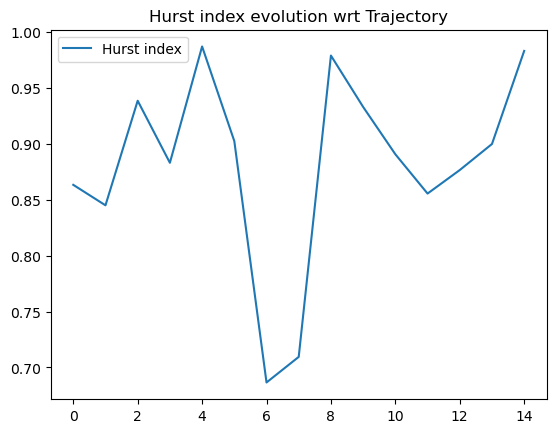

In [9]:
Number_indices = 15
dimension = 2
Hs = [0.15 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    #Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])
    Multiple_Sfbms.append([Sfbm(Hs[i],0.068970 ,2**14) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'curve')

#### Increase the dimension d=15

*******************************
res =        fun: 9.08707658609849
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.7406225 , -8.00286687, 10.        ])
*******************************
Objective function value after calibration =  0.06837213035124812
H =  0.8507661169191457 lambda2 = 0.0003343904226215661 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  9.087171755727862e-170 J =  820.2604478239236 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 10.241677326733537
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([

Objective function value after calibration =  0.059336654713046943
H =  0.8361069434698811 lambda2 = 0.00013654746467284886 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.7836517458482808e-146 J =  711.8618465924242 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 9.99663008597788
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.80759429, -9.23398922, 10.        ])
*******************************
Objective function value after calibration =  0.0644351115766707
H =  0.8590708713250117 lambda2 = 9.765332266210965e-05 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.2943483160426107e-159 J =  773.0280335853184 J_95 =  18.30703805327515
-------------------------------------------

Objective function value after calibration =  0.059374654720415365
H =  0.8034113049552841 lambda2 = 0.0007180447209334687 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.4237202832362051e-146 J =  712.3177326808232 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 9.084834417072287
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.72621005, -8.61235831, 10.        ])
*******************************
Objective function value after calibration =  0.055187301387616294
H =  0.8489270020938445 lambda2 = 0.00018181149650707367 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  8.615649276820295e-136 J =  662.0820547472326 J_95 =  18.30703805327515
-----------------------------------------

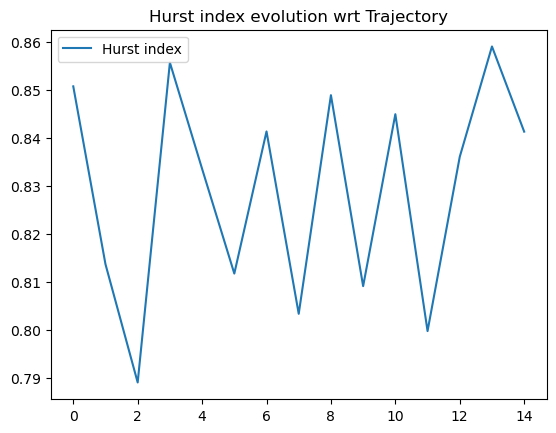

In [9]:
Number_indices = 15
dimension = 10
Hs = [0.25 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'curve')

#### Let's plot the Hat{H} distribution over multiple index trajectories :  Multifractal independant processes 

*******************************
res =        fun: 22.82082177198923
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.42785744, -6.70803019, 10.        ])
*******************************
Objective function value after calibration =  0.06928152195148882
H =  0.605361928944638 lambda2 = 0.0012195778469947128 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  4.0950196795622105e-172 J =  831.1704188520114 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 654.4389894927856
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([

Objective function value after calibration =  0.014152990768571933
H =  0.6871192958496527 lambda2 = 0.0016658138316828055 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  3.0611079519968515e-31 J =  169.79343025055746 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1087.7096783112952
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.33695958, -4.96360424, 10.        ])
*******************************
Objective function value after calibration =  0.06347965943532441
H =  0.7919895012102337 lambda2 = 0.006939207990451906 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  3.7603676716550786e-157 J =  761.565474245587 J_95 =  18.30703805327515
-------------------------------------------

Objective function value after calibration =  0.0333225994487385
H =  0.8789439352356307 lambda2 = 0.0032452953495254325 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.0530050262154806e-79 J =  399.77122558651575 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 7895.814808715075
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 2.80569586, -4.06223714, 10.        ])
*******************************
Objective function value after calibration =  0.10311557883241851
H =  0.942982842741296 lambda2 = 0.016919284881692608 T =  22026.465794806718 lsigma2 = 4.5399929762484854e-05 p-Value=  1.445712982039306e-259 J =  1237.0775992525248 J_95 =  18.30703805327515
----------------------------------------------

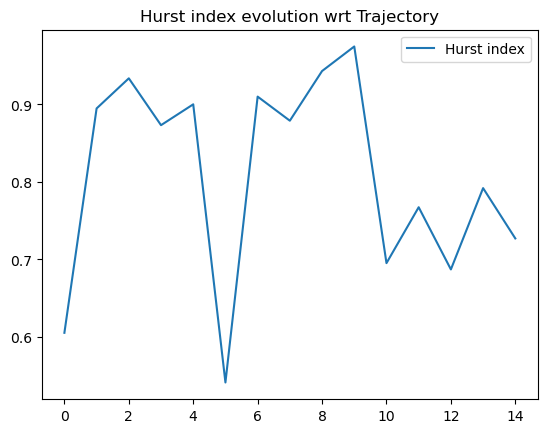

In [8]:
Number_indices = 10
dimension = 2
Hs = [0.001 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'curve')